## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import datetime
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import pickle
import matplotlib.pyplot as plt
#%inline matplotlib

## Load data set into data frame

In [2]:
#df=pd.read_excel('C:/Users/1255467/Downloads/Project/Project/TRAIN.xlsx')

## Removing Outliers

In [3]:
def drop_numerical_outliers(df, z_thresh=3):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh, reduce=False) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)


# Feature Engineering

In [4]:
### Encoding the Airlines feature

In [5]:
def Airlines(df):
    airlines=pd.get_dummies(df['Airline'],drop_first=False)
    return airlines

In [6]:
### Departure andf Arival station selection

In [7]:
def stations(df):
    b=list(set(list(df['Departure Station'])) | set(list(df['Arrival Station'])))
    station=pd.DataFrame(0,columns=b,index=df.index)
    #df=pd.concat([df,aa],axis=1)\
    def stations(para):
            for i,city in zip(df[para].index,df[para]):
                station[city][i]=1
            return True
    for i in ['Departure Station','Arrival Station']:
        stations(i)
    return station

### Number of stops between source and destination

In [8]:
def Num_stations(route):
    return len(route.split('→'))-2


### Finding the given day is weekday or weekend

In [12]:
#monday-0, tue-1,...Sun-6
def week(day):
    day_num=datetime.datetime.strptime(day,'%d/%m/%Y').weekday()
    if day_num  in [0,1,2,3,4]:
        return 'Weekday'
    else:
        return 'Weekend'



In [13]:
### converting Extrainfo column

In [14]:
def extra_info1(para):
    if para in ['No Info','No info']:
        return 'No info'
    else:
        return para


In [15]:
### conver the Journy time into hours.

In [16]:
def journy_time(para):
    if 'm' in para and 'h' in para:
        h,m=para.split()
        h,m=int(h[:-1]),int(m[:-1])
        return (h*60+m)/60
    elif 'm' in para:
        m=para[:-1]
        return int(m)/60
    else:
        h=para[:-1]
        return int(h)


In [17]:
### Feature engineering on Journy time.

In [18]:
def fet_jtime(df):
    df['Journy_log_hrs']=df['Journy_hrs'].apply(lambda x:np.log1p(x))
    df['Journy_root_hrs']=df['Journy_hrs'].apply(lambda x:x**0.5)
    df['journy*stops_log']=np.log1p(df['Journy_root_hrs']*df['Num_stops'])

In [19]:
### Routing

In [20]:
def route(item):
    a=set()
    [a.add(y.strip()) for x in list(Dataset[item]) for y in x.split('→')]
    #print(a)
    route_data=pd.DataFrame(0,columns=list(a),index=Dataset.index)
    
    for i,route in zip(Dataset[item].index,Dataset[item]):
        for j in [j.strip() for j in route.split('→')]:
            route_data[j][i]=1
       
    return route_data


In [21]:
## Traing the model

In [22]:
Dataset=pd.DataFrame()
Dataset.drop(Dataset.columns,axis=1,inplace=True)
Dataset=pd.read_excel('TRAIN.xlsx')
#execute the preprocessing
#removing the outliers
drop_numerical_outliers(Dataset)
#
airlines=Airlines(Dataset)
Dataset=pd.concat([Dataset,airlines],axis=1)
station=stations(Dataset)
Dataset=pd.concat([Dataset,station],axis=1)
Dataset['Num_stops']=Dataset.apply(lambda x: Num_stations(x['Route Map']),axis=1 )
Dataset['day_type']=Dataset.apply(lambda x: week(x['Date']),axis=1)
date_days=pd.get_dummies(Dataset['day_type'],drop_first=False)
Dataset=pd.concat([Dataset,date_days],axis=1)
#*******Route set*****
Route_ds=route('Route Map')
Dataset=pd.concat([Dataset,Route_ds],axis=1)

Dataset['Extra Info']=Dataset.apply(lambda x: extra_info1(x['Extra Info']),axis=1)
extrainfo=pd.get_dummies(Dataset['Extra Info'],drop_first=False)
Dataset=pd.concat([Dataset,extrainfo],axis=1)

Dataset['Journy_hrs']=Dataset.apply(lambda x:journy_time(x['Journey Time']),axis=1)
fet_jtime(Dataset)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The reduce argument is deprecated and will be removed in a future version. You can specify result_type='reduce' to try to reduce the result to the original dimensions
  after removing the cwd from sys.path.


### Remove Extra feature

In [23]:
Dataset=Dataset.drop(columns=['Airline','Date', 'Departure Station', 'Arrival Station','Route Map','Departure Time','Arrival Time','Journey Time','Stops','Extra Info','day_type','Journy_hrs'])


In [24]:
Dataset.columns

Index(['Price', 'Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Hyderabad', 'Chennai',
       'Banglore', 'Mumbai', 'New Delhi', 'Cochin', 'Kolkata', 'Delhi',
       'Num_stops', 'Weekday', 'Weekend', 'COK', 'HYD', 'GOI', 'VNS', 'GWL',
       'BLR', 'LKO', 'AMD', 'BHO', 'UDR', 'NAG', 'IXZ', 'IMF', 'ISK', 'DEL',
       'DED', 'RPR', 'CCU', 'JDH', 'IXC', 'MAA', 'GAU', 'JLR', 'IXA', 'TRV',
       'STV', 'IDR', 'BDQ', 'VGA', 'BOM', 'NDC', 'JAI', 'IXB', 'HBX', 'IXU',
       'PAT', 'KNU', 'PNQ', 'IXR', 'ATQ', 'BBI', 'VTZ', '1 Long layover',
       'Change airports', 'In-flight meal not included',
       'No check-in baggage included', 'No info', 'Red-eye flight',
       'Journy_log_hrs', 'Journy_root_hrs', 'journy*stops_log'],
      dtype='object')

### Features extraction for input & output training set

In [25]:
X_features=Dataset.drop(columns=['Price'],axis=1)
Y_feature=Dataset['Price']

### Visulize the features

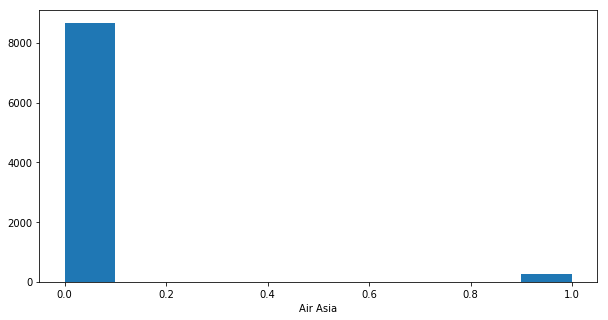

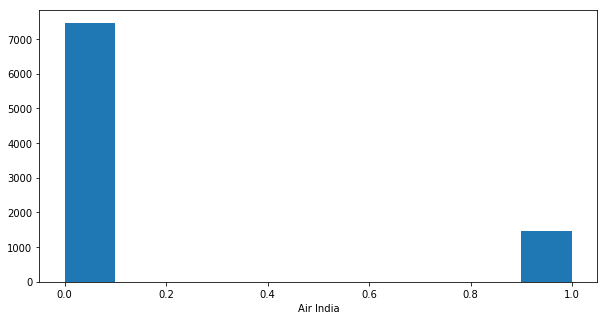

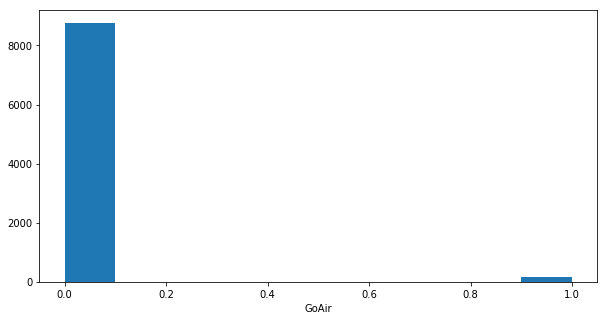

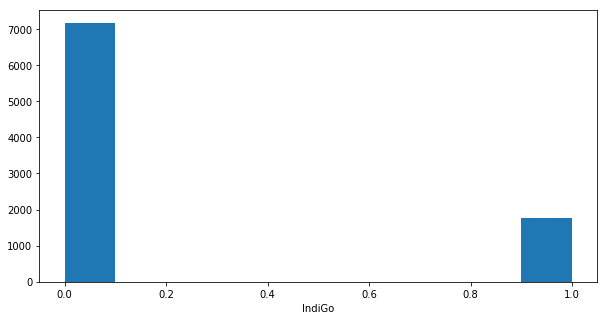

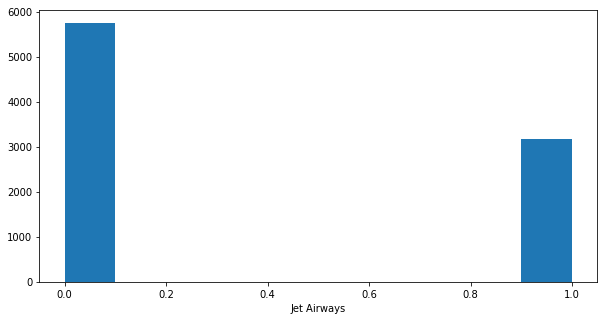

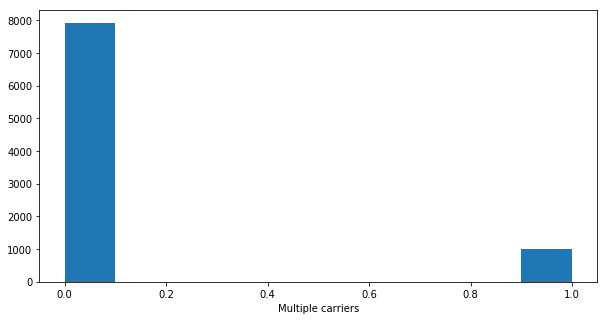

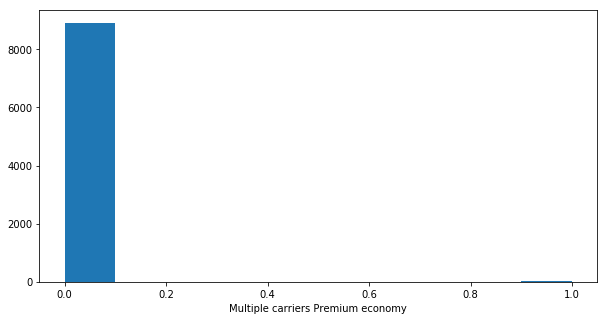

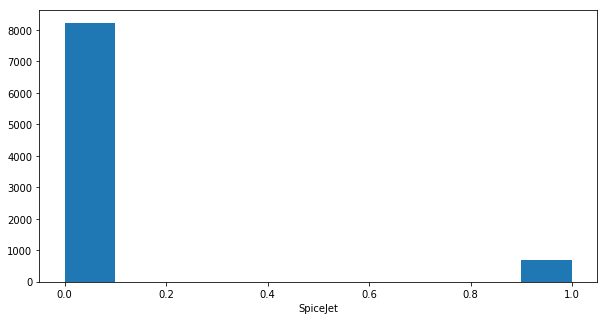

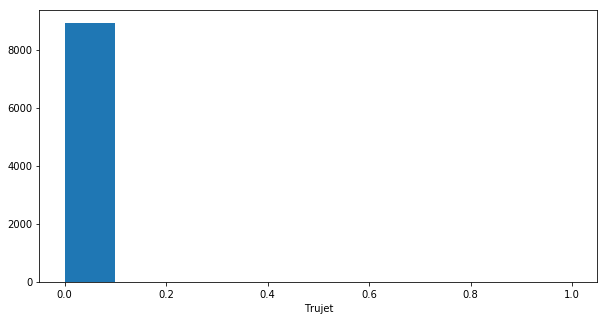

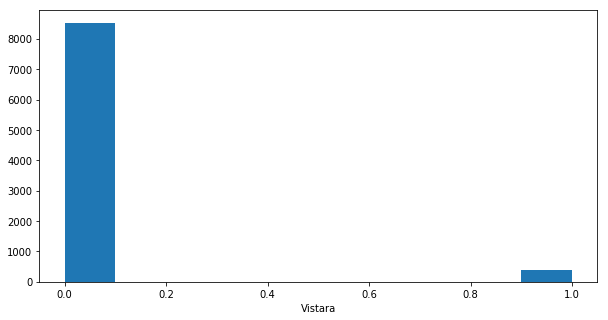

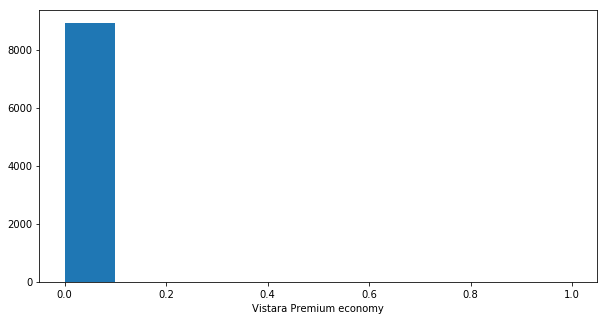

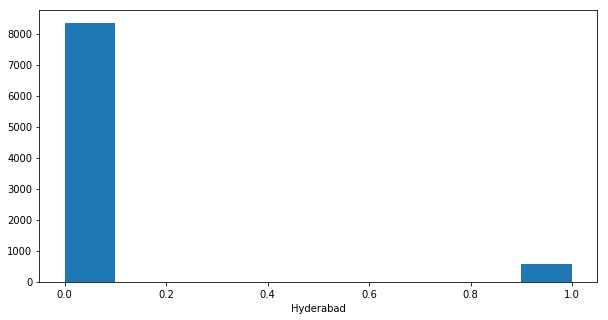

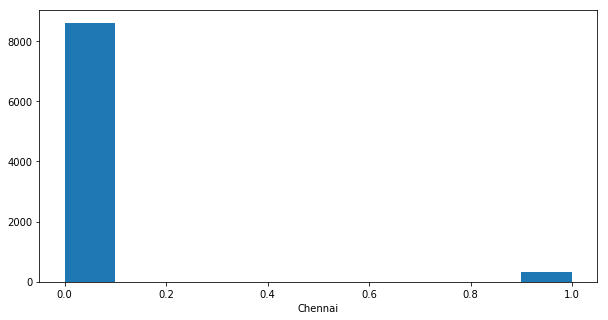

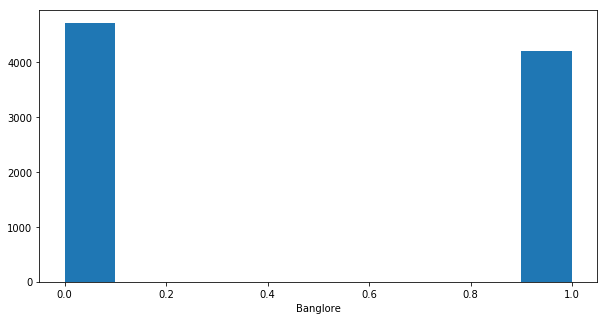

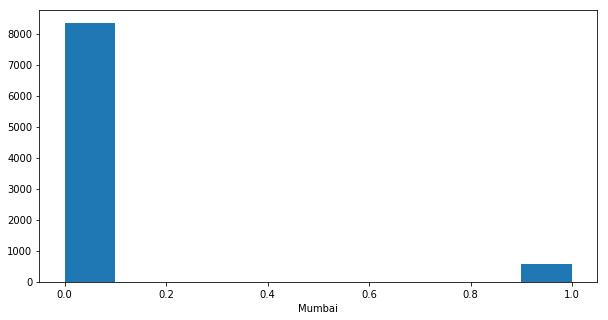

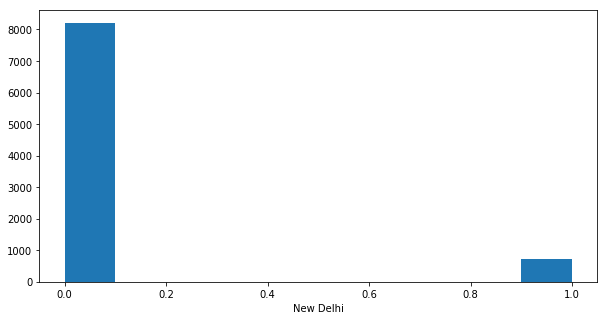

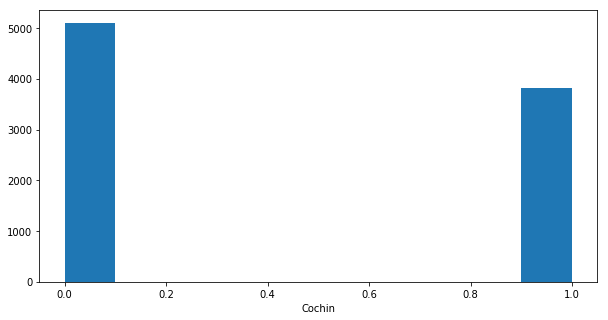

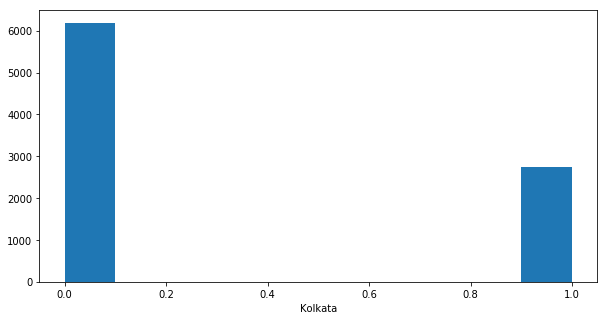

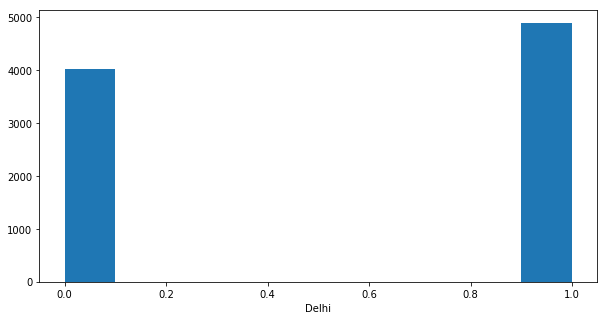

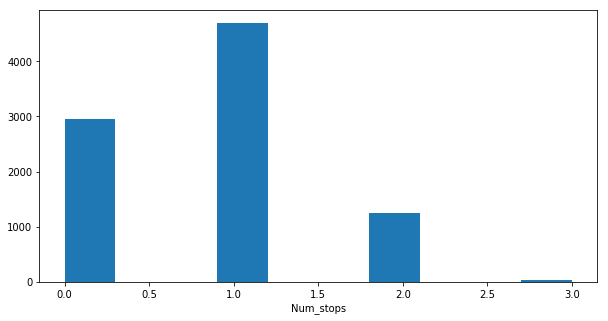

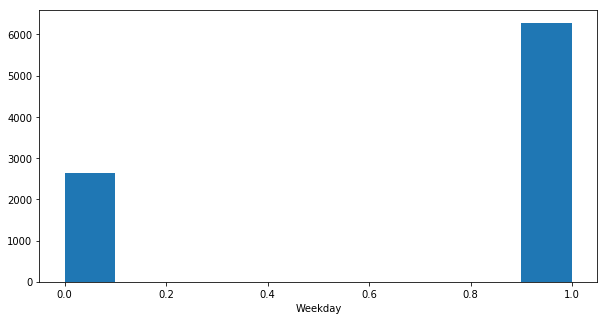

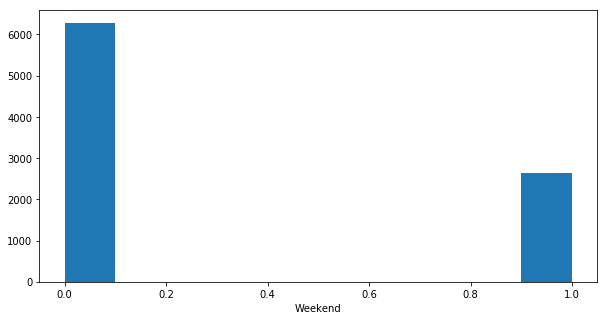

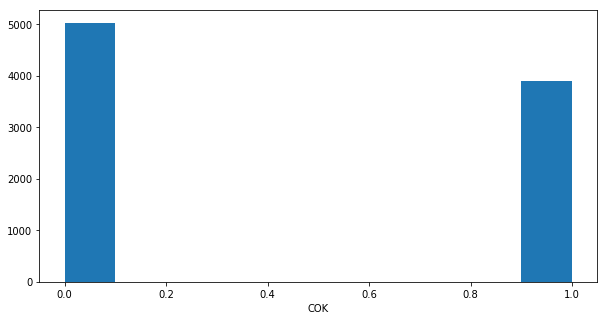

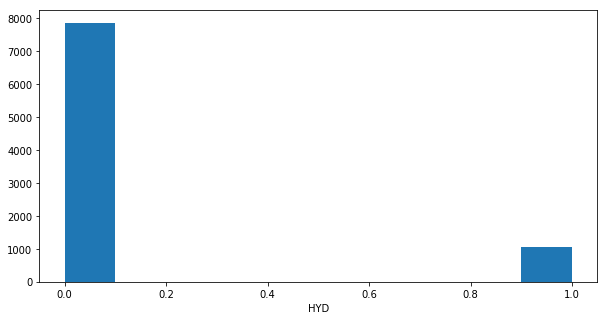

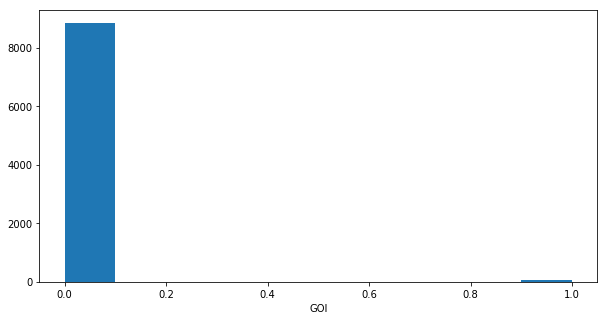

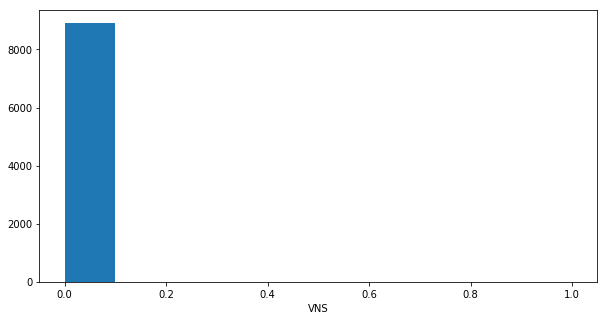

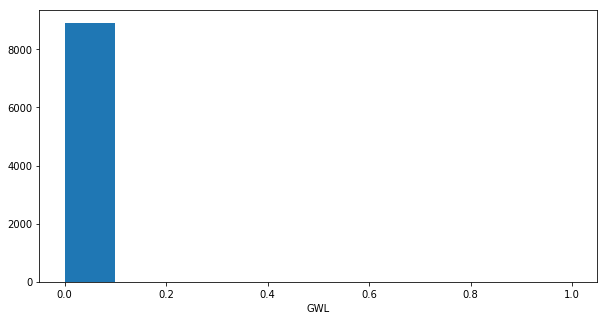

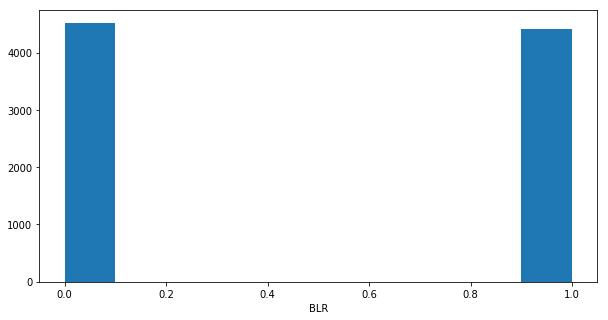

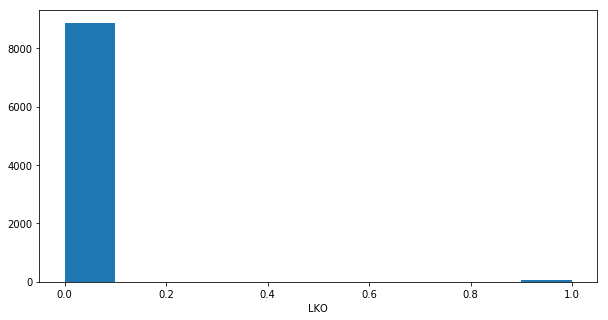

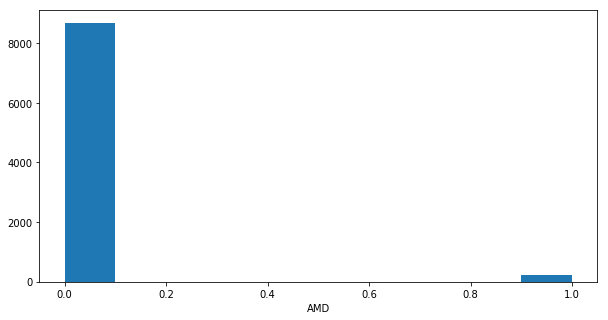

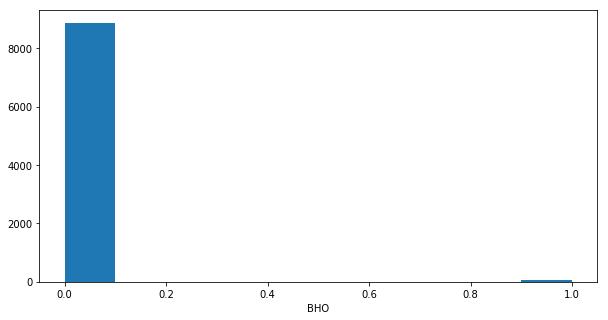

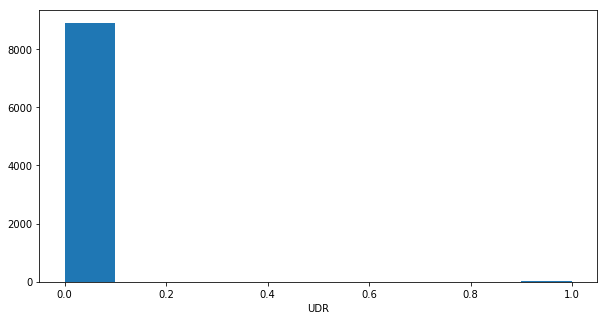

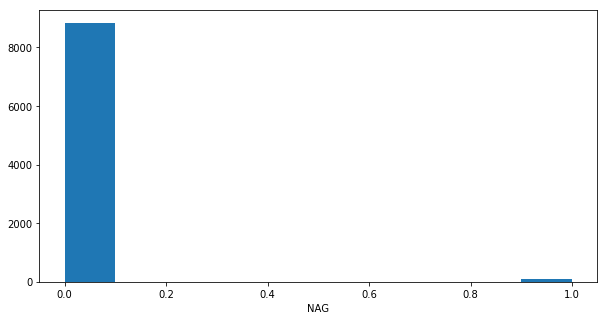

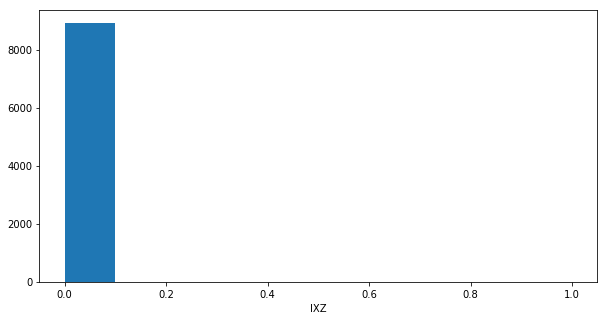

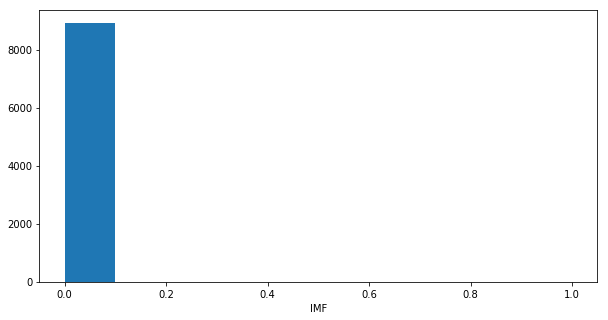

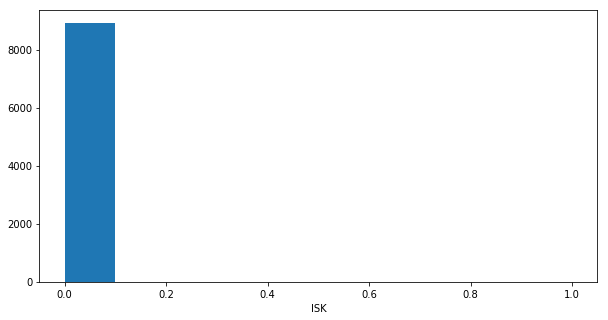

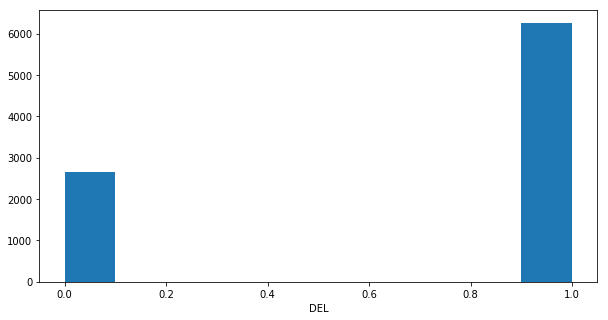

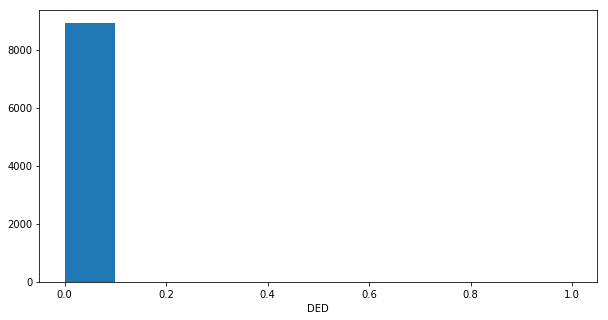

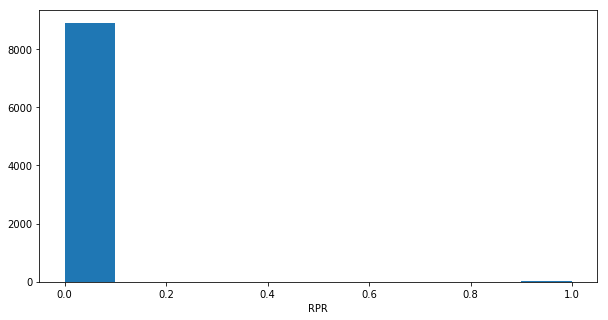

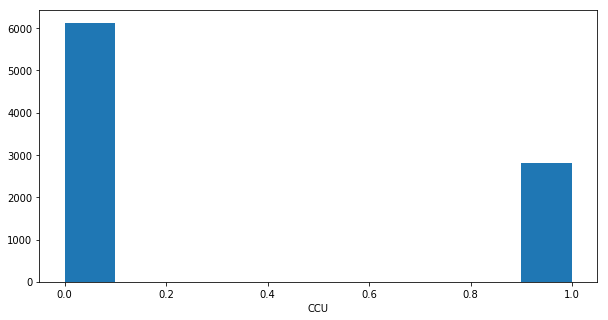

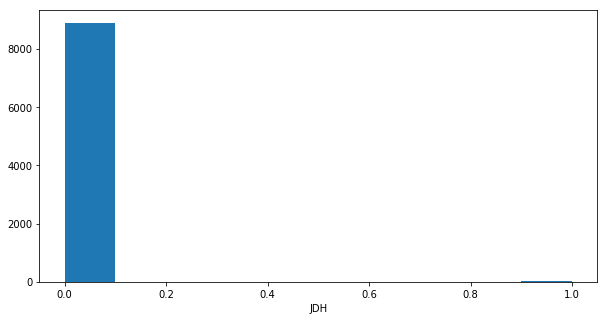

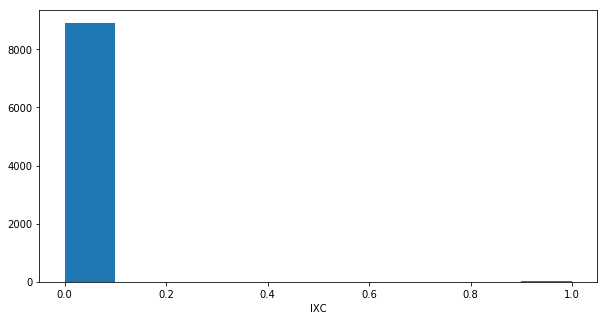

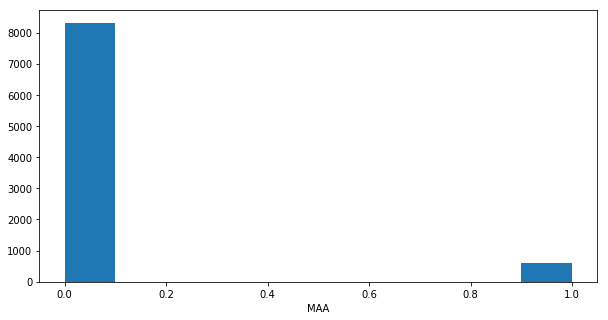

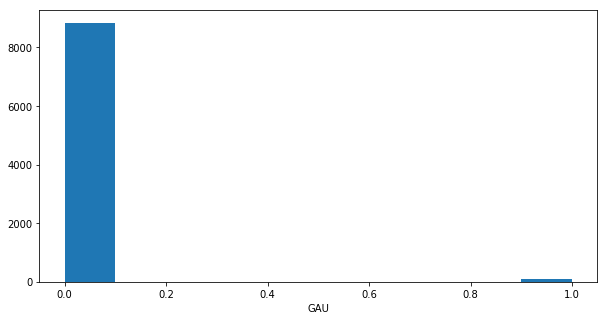

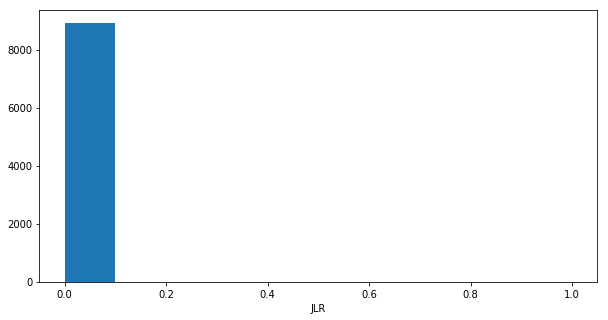

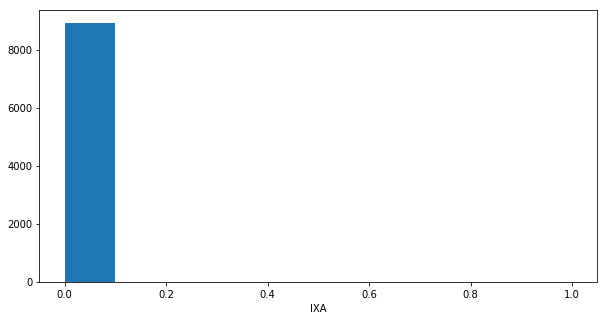

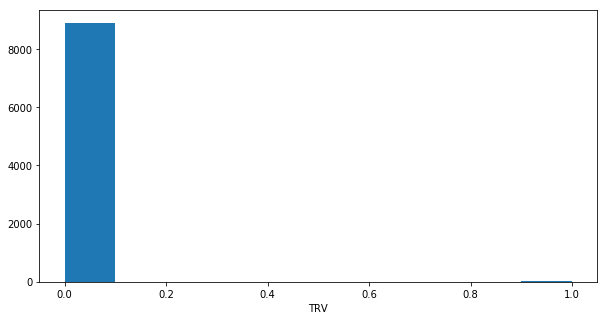

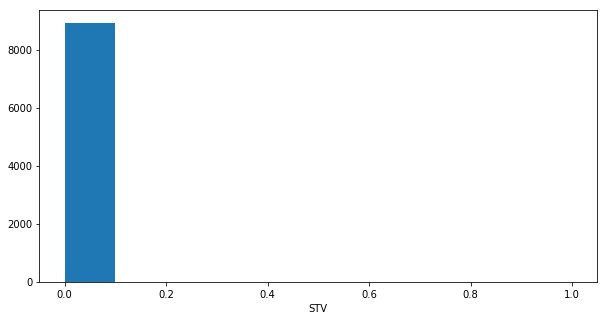

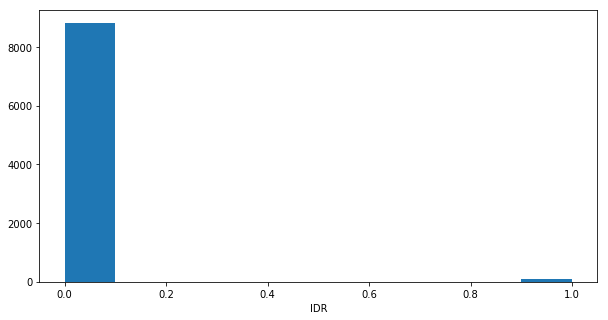

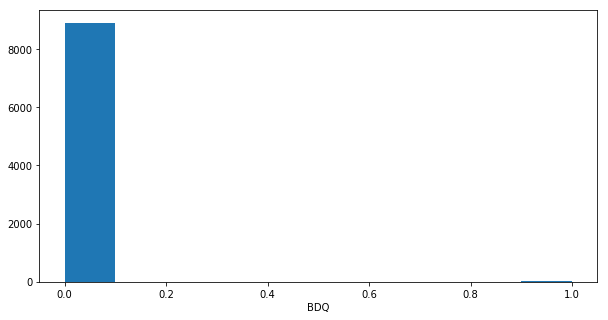

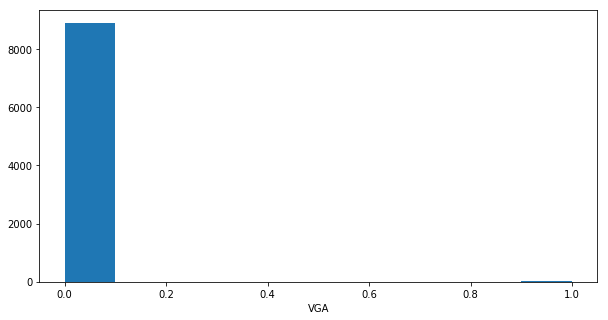

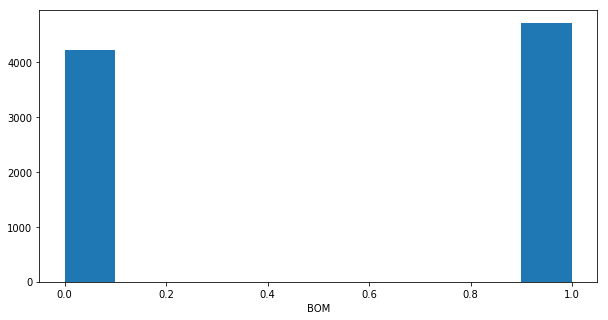

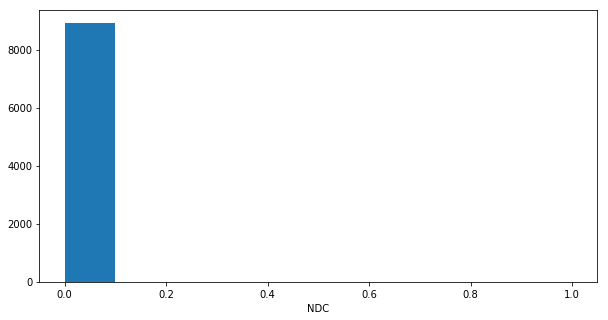

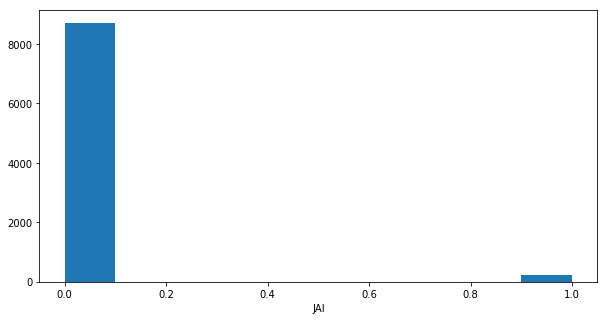

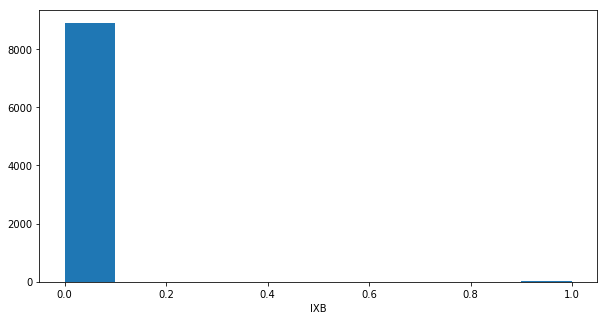

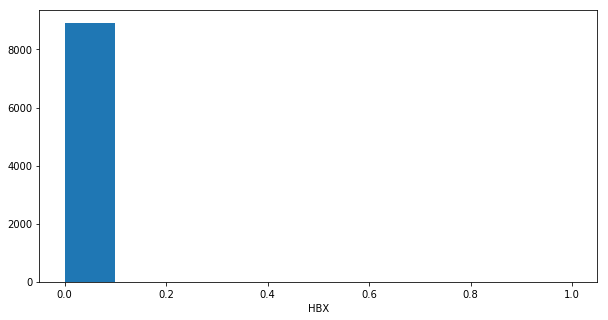

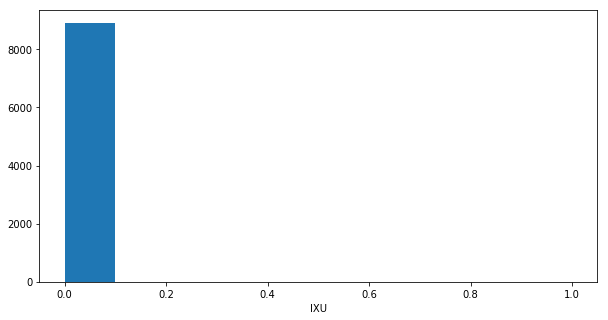

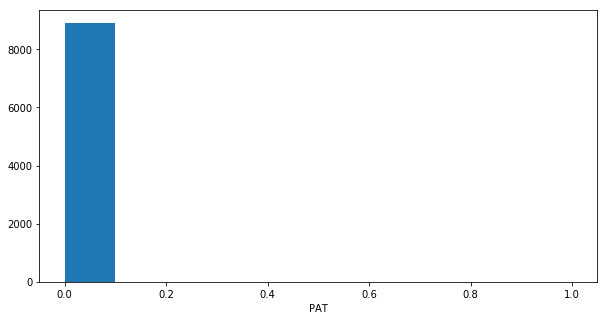

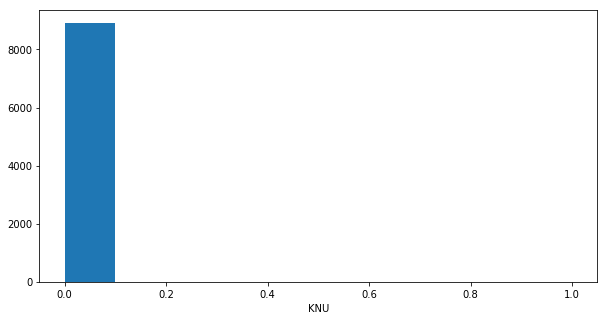

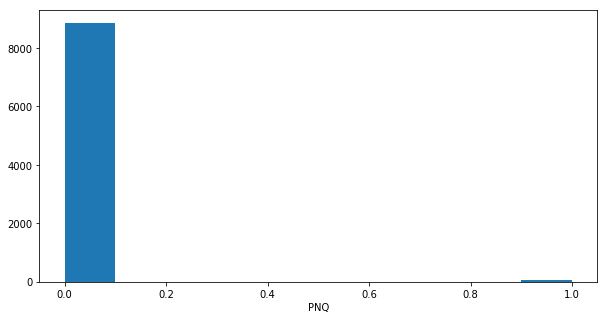

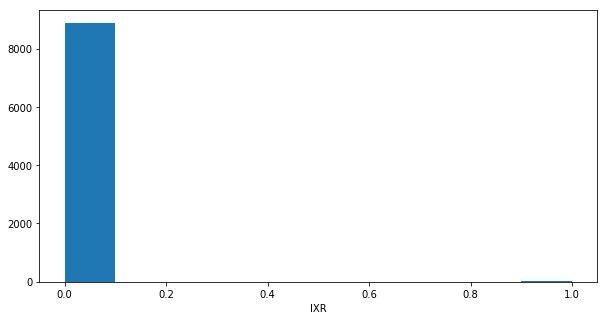

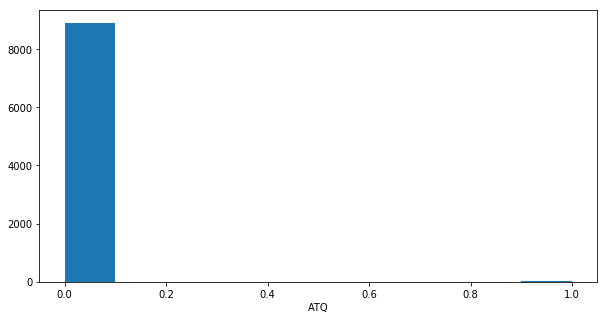

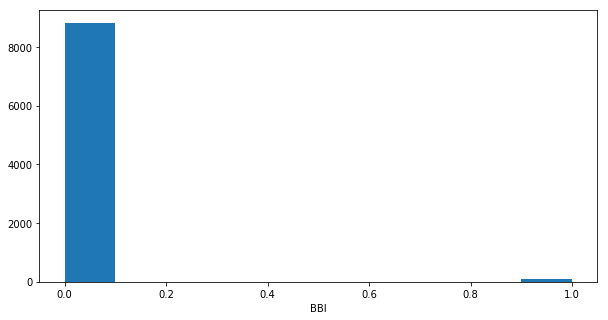

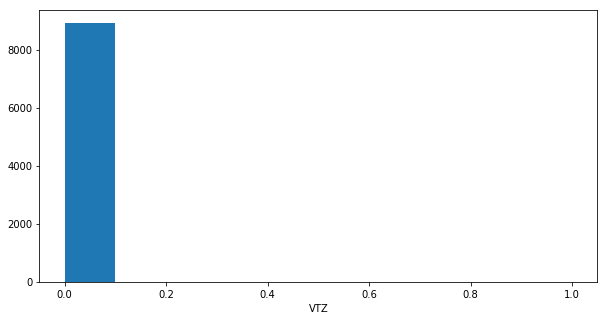

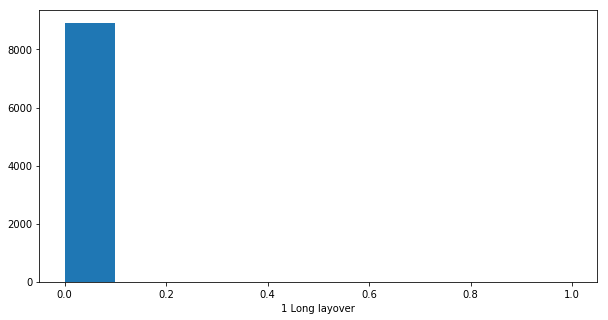

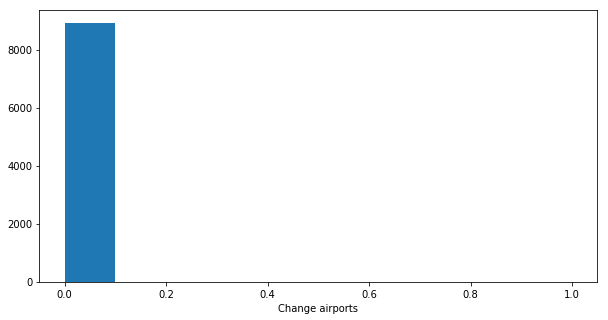

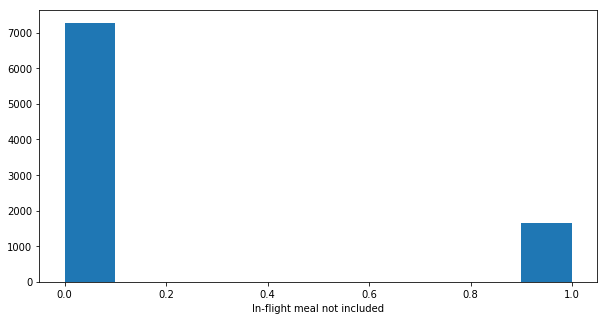

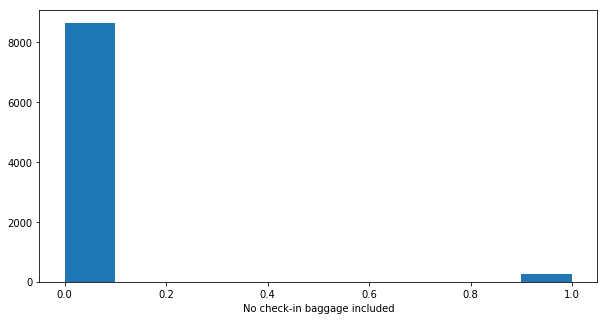

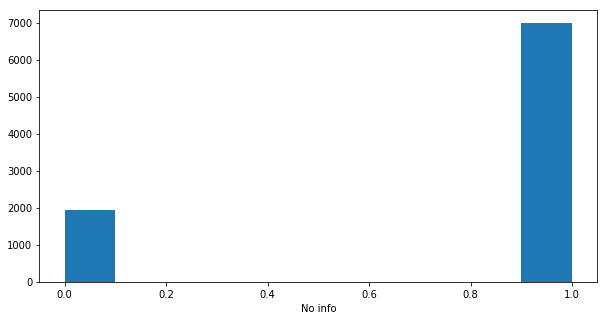

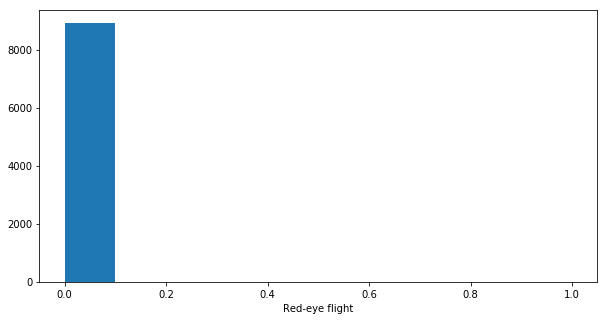

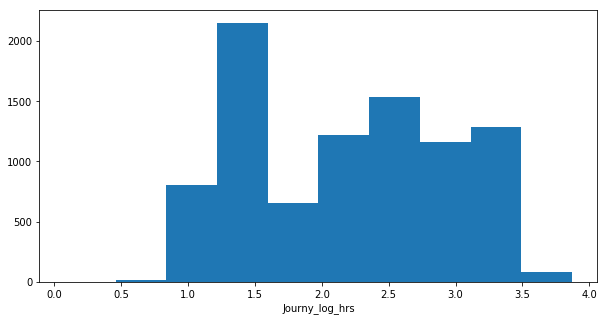

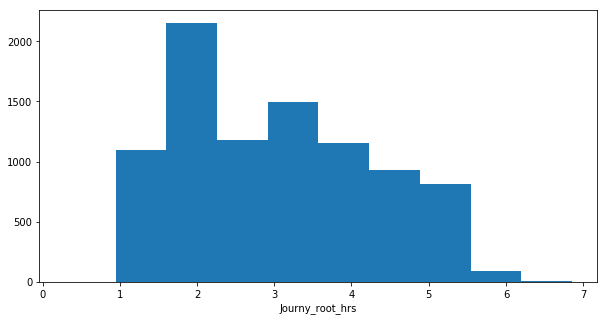

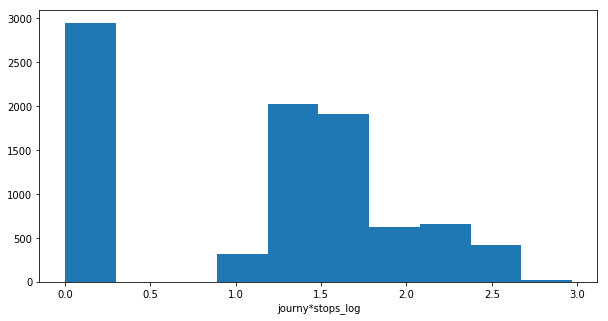

In [26]:
for i in list(X_features.columns):
    plt.figure(figsize=(10,5))
    plt.hist(X_features[i])
    plt.xlabel(i)
    plt.show()

### Traing your model

In [27]:
# Fit regression model
params = {'n_estimators': 10, 'max_depth': 15, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
#clf=LinearRegression(fit_intercept=False, normalize=True, copy_X=True)
clf.fit(X_features,Y_feature)

pickle.dump(clf, open("Model.pickle","wb"))
pickle.dump(list(X_features.columns),open("X_columns.pickle","wb"))